<a href="https://colab.research.google.com/github/NongNNew/Project_499/blob/main/Split_and_MFCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HMM

### Import audio file
- download wave file: https://drive.google.com/file/d/1HmeSGwJEGN-bh6EV5FzcGiESdzsmW5Tn/view?usp=sharing

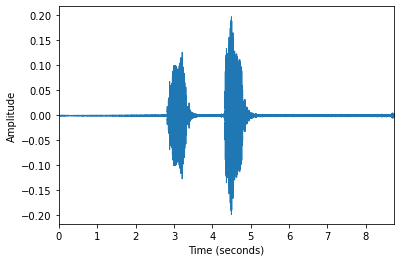

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio = 'southern_banana.wav' # กล้วยใต้
x,sr = librosa.load(audio)

plt.figure()
librosa.display.waveplot(y=x, sr=sr)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
from IPython.display import Audio

Audio(audio) #listen the audio

### Split audio file using Silence

https://github.com/VVasanth/MachineLearning/tree/master/Librosa-SplitOnSilence

In [ ]:
audio_time = list()
sampling_rate = list()

def Split_Audio_without_Silence(audio,x,sr):
    for nonMuteSection in librosa.effects.split(x,top_db=20): # ตัดเสียงที่ต่ำกว่า 20 เดซิเบล
        print('Time start:', nonMuteSection[0]/sr,'sec end:', nonMuteSection[1]/sr,'sec')
        
        x,sr = librosa.load(audio, 
                            offset=nonMuteSection[0]/sr, 
                            duration=(nonMuteSection[1]-nonMuteSection[0])/sr)
        
        audio_time.append(x)
        sampling_rate.append(sr)
        

Split_Audio_without_Silence(audio,x,sr)

Time start: 2.809614512471655 sec end: 3.4133333333333336 sec
Time start: 4.295691609977324 sec end: 4.922630385487528 sec


### Feature Extraction: MFCC

https://stackoverflow.com/questions/60492462/mfcc-python-completely-different-result-from-librosa-vs-python-speech-features

https://python-speech-features.readthedocs.io/en/latest/

In [ ]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=2741ba5808f741798b663ca692bb75c38e494d6b626cbb49689fe752f7018427
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [ ]:
import python_speech_features
from scipy.signal.windows import hamming
 
mfcc_speech = [python_speech_features.mfcc(signal=audio_time[i], 
                                           samplerate=sampling_rate[i], 
                                           winlen= 512/sampling_rate[i], 
                                           winstep= 160/sampling_rate[i],
                                           numcep= 13,
                                           nfilt= 40, 
                                           nfft= 512,
                                           lowfreq= 0,
                                           highfreq= None,
                                           preemph= 0.97, 
                                           ceplifter= 0,
                                           winfunc= hamming) 
               for i in range(len(audio_time))]

In [ ]:
mfcc_speech[0]

array([[ -8.33593086,  -6.61023678,   6.35033278, ...,  -0.60806037,
         -0.03571527,   0.55549391],
       [ -9.97106385,  -5.87295183,   6.65682038, ...,  -1.04420138,
         -0.70794306,  -0.23597246],
       [-10.39015941,  -2.33120623,   7.53818419, ...,  -1.45210358,
         -0.05564118,  -0.13370578],
       ...,
       [ -7.99544787,  -6.91423274,   2.87276961, ...,  -1.22981547,
         -2.82031313,   1.267224  ],
       [-10.07589552,  -2.81207862,   2.61280662, ...,  -2.3737052 ,
         -3.19787355,  -0.79815481],
       [-10.28647515,  -2.53223163,   1.93430448, ...,  -2.59337577,
         -1.93643864,  -0.05036016]])

In [ ]:
mfcc_speech[1]

array([[ -7.749718  , -13.68452491,  -4.54130189, ...,   2.76934268,
         -0.28352796,   1.04198317],
       [ -7.24386573,  -3.70295302,  -2.97001876, ...,  -0.70050961,
         -1.82819304,  -0.58458447],
       [ -6.04591392,   1.51130933,  -6.08471692, ...,  -2.28095068,
         -0.50466766,  -1.94631062],
       ...,
       [-10.1094801 ,  -2.06239515,   3.74442325, ...,  -2.52310086,
         -0.91543636,   0.79071833],
       [-10.33736211,  -1.41643366,   5.17005592, ...,  -1.73828382,
          0.07242172,   0.76452182],
       [-10.88955416,  -1.89194615,   5.12631345, ...,  -1.7370708 ,
         -0.52235747,   1.21475836]])

# CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import librosa
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

In [ ]:
X = []
Y = []
names = ['กล้วยน้ำว้า','กล้วยหอม','กระท้อน','ตะขบไทย','ทับทิม','น้อยหน่า','พุทรา','ฝรั่ง','มะปราง','มะพลับ']

In [ ]:
for name in names:
    print(name) 
    for num in ('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15'):
        audio = name + str(num) + '.wav'
        y,sr = librosa.load(audio,duration=6,offset=0)
        X.append(librosa.feature.mfcc(y,sr,n_mfcc=13))
        Y.append(names.index(name))


กล้วยน้ำว้า
กล้วยหอม
กระท้อน
ตะขบไทย
ทับทิม
น้อยหน่า
พุทรา
ฝรั่ง
มะปราง


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X.shape

(135, 13, 259)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, 5, input_shape=(13, 259, 1), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, 5, activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(9, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X[:,:,:,None], Y, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 286ms/step - loss: 260.9908 - accuracy: 0.0889
Epoch 2/100
5/5 [==============================] - 1s 276ms/step - loss: 30.7239 - accuracy: 0.1704
Epoch 3/100
5/5 [==============================] - 1s 280ms/step - loss: 5.5798 - accuracy: 0.0963
Epoch 4/100
5/5 [==============================] - 1s 267ms/step - loss: 2.6452 - accuracy: 0.1630
Epoch 5/100
5/5 [==============================] - 1s 269ms/step - loss: 2.3088 - accuracy: 0.1630
Epoch 6/100
5/5 [==============================] - 1s 260ms/step - loss: 1.9350 - accuracy: 0.2593
Epoch 7/100
5/5 [==============================] - 1s 254ms/step - loss: 1.8874 - accuracy: 0.2667
Epoch 8/100
5/5 [==============================] - 1s 259ms/step - loss: 1.7096 - accuracy: 0.3630
Epoch 9/100
5/5 [==============================] - 1s 260ms/step - loss: 1.6167 - accuracy: 0.4370
Epoch 10/100
5/5 [==============================] - 1s 263ms/step - loss: 1.3692 - accuracy: 0.4889
Epoch 

In [ ]:
pred=[]
for name in names:
    for num in ('16','17','18','19','20'):
        audio = name + num + '.wav'
        y,sr = librosa.load(audio,duration=6,offset=0)
        feature = librosa.feature.mfcc(y,sr,n_mfcc=13)
        pred.append(names[model.predict(feature[None,:,:,None]).argmax()])
        print(audio)
        print(names[model.predict(feature[None,:,:,None]).argmax()])
        print('****************************************************************')

กล้วยน้ำว้า16.wav
กล้วยน้ำว้า
****************************************************************
กล้วยน้ำว้า17.wav
กล้วยน้ำว้า
****************************************************************
กล้วยน้ำว้า18.wav
กล้วยน้ำว้า
****************************************************************
กล้วยน้ำว้า19.wav
กล้วยน้ำว้า
****************************************************************
กล้วยน้ำว้า20.wav
กล้วยน้ำว้า
****************************************************************
กล้วยหอม16.wav
กล้วยหอม
****************************************************************
กล้วยหอม17.wav
กล้วยหอม
****************************************************************
กล้วยหอม18.wav
กล้วยหอม
****************************************************************
กล้วยหอม19.wav
กล้วยหอม
****************************************************************
กล้วยหอม20.wav
กล้วยหอม
****************************************************************
กระท้อน16.wav
กระท้อน
**********************************************************